In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.fftpack import fftfreq
from scipy.fftpack import fft, ifft

In [2]:
t=np.linspace(0,2,28000) #sampling rate = 280000
sin1=[]
sin2=[]
sin3=[]
sin4=[]
sin5=[]
sinNet=[]

In [3]:
# Here f1 = 3 and phase is 0
def sinAngle_1(t):
    return np.sin(30*math.pi*t)

#  Let the second sin function be sin(5pi*t)
# Here f2 = 5 and phase is 0
def sinAngle_2(t):
    return np.sin(50*math.pi*t )

#  Let the second sin function be sin(7pi*t )
# Here f3 = 7 and phase is 0
def sinAngle_3(t):
    return np.sin(70*math.pi*t )

#  Let the second sin function be sin(9pi*t )
# Here f2 = 9 and phase is 0
def sinAngle_4(t):
    return np.sin(90*math.pi*t )

#  Let the second sin function be sin(15pi*t )
# Here f2 = 15 and phase is 0
def sinAngle_5(t):
    return np.sin(150*math.pi*t )

In [4]:
for i in range(len(t)):
    sin1.append(sinAngle_1(t[i]))    
    
for i in range(len(t)):
    sin2.append(sinAngle_2(t[i]))

for i in range(len(t)):
    sin3.append(sinAngle_3(t[i]))  

for i in range(len(t)):
    sin4.append(sinAngle_4(t[i]))

for i in range(len(t)):
    sin5.append(sinAngle_5(t[i]))

for i in range(len(t)):
    sinNet.append(sin1[i]+sin2[i]+sin3[i]+sin4[i]+sin5[i])

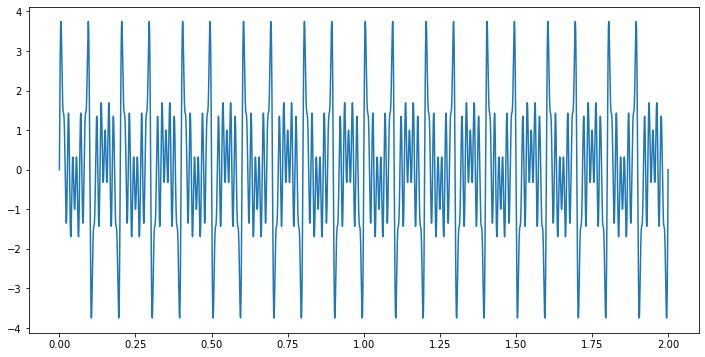

In [5]:
plt.figure(figsize = (12, 6))
plt.plot(t,sinNet)


In [6]:
#speech signal processing using butterwortk low

import soundfile as sf
from scipy import signal

#read .wav file 
input_signal,fs = sf.read('/home/saqib/iith/sem5/BM3000/ReaganBeginsBombingRussia.ogg') 

#sampling frequency of Input signal
sampl_freq=fs

#order of the filter
order=4   

#cutoff frquency 4kHz
cutoff_freq=3300.0  

#digital frequency
Wn=2*cutoff_freq/sampl_freq  

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order,Wn, 'low') 

#filter the input signal with butterworth filter
output_signal = signal.filtfilt(b, a, input_signal)
#output_signal = signal.lfilter(b, a, input_signal)

#write the output signal into .wav file
sf.write('Sound_With_ReducedNoise.wav', output_signal, fs) 


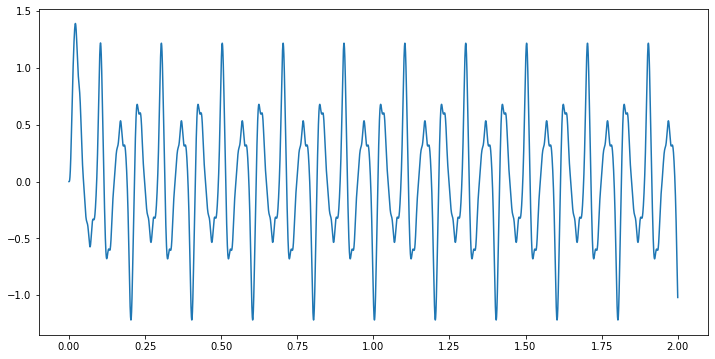

In [7]:
#speech signal processing using butterwortk low pass filter

import soundfile as sf
from scipy import signal

#read .wav file 
input_signal = sinNet

#sampling frequency of Input signal
#sampl_freq=fs

#order of the filter
order=2

#cutoff frquency 4kHz
cutoff_freq=70

#digital frequency
Wn=2

# b and a are numerator and denominator polynomials respectively
b_a = signal.butter(order,Wn, 'lp',fs=2000,output='sos') 

#filter the input signal with butterworth filter
#output_signal = signal.filtfilt(b, a, input_signal)
#output_signal = signal.lfilter(b, a, input_signal)
output_signal=  signal.sosfilt(b_a,input_signal)

plt.figure(figsize = (12, 6))
plt.plot(t,output_signal)

#write the output signal into .wav file
#sf.write('Sound_With_ReducedNoise.wav', output_signal, fs) 


/tmp/ipykernel_7917/935746351.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, np.abs(sinNet_fft), 'b', markerfmt=" ", basefmt="-b")


Text(0, 0.5, 'FFT Amplitude')

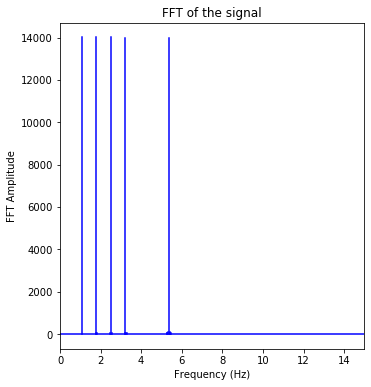

In [8]:
#plotting the fourier

sinNet_fft = fft(sinNet)
freq = fftfreq(len(sinNet), d=1./1000)
# print(sig1_fft)

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sinNet_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of the signal')
plt.xlim(0, 15)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')

(array([  3.14159265,   1.57090743,   1.57102091, ..., -56.55288209,
        -56.54464093, -56.54866779]),
 array([0.00000000e+00, 7.14285714e-05, 1.42857143e-04, ...,
        9.99857143e-01, 9.99928571e-01, 1.00000000e+00]),
 <matplotlib.lines.Line2D at 0x7fcfd3d5acd0>)

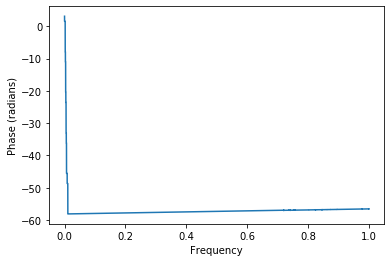

In [9]:
plt.phase_spectrum(sinNet)

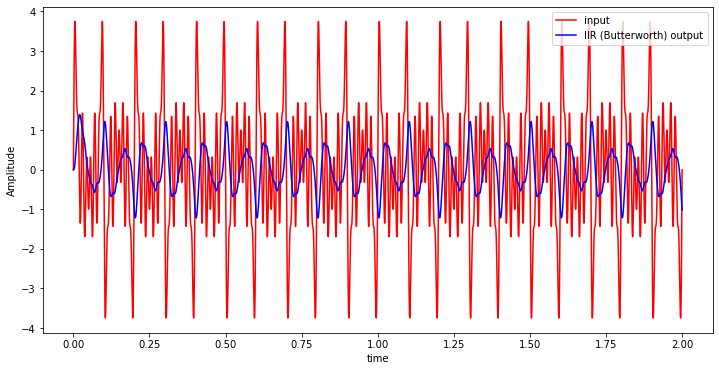

In [14]:
#plotting the sin wave and the filtered wave in the same plot
plt.figure(figsize=(12,6))
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.plot(t,sinNet,'red')
plt.plot(t,output_signal,'blue')
plt.legend(['input','IIR (Butterworth) output'])
plt.show()

In [17]:
#speech signal processing using butterwortk low

import soundfile as sf
from scipy import signal
import scipy as sp
#read .wav file 
input_signal,fs = sf.read('/home/saqib/iith/sem5/BM3000/ReaganBeginsBombingRussia.ogg') 

#sampling frequency of Input signal
sampl_freq=fs

#order of the filter
order=4   

#cutoff frquency 4kHz
cutoff_freq=3300.0  

#digital frequency
Wn=2*cutoff_freq/sampl_freq  

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order,Wn, 'low') 

#filter the input signal with butterworth filter
output_signal = signal.filtfilt(b, a, input_signal)
#output_signal = signal.lfilter(b, a, input_signal)

#write the output signal into .wav file
sf.write('filteredSpeech.wav', output_signal, fs) 
